<a href="https://colab.research.google.com/github/VVKate/Neural_University_HomeWorks/blob/main/9_%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнеее задание: Июльский курс (2020). Pro. Занятие 9
# Автокодировщики
## Верхошинская Катерина Викторовна

## **LIGHT**

### **Вариант 1**
**Задание:** 

Перепишите автокодировщик для базы лиц “с нуля”, в новом ноутбуке. Можно подсматривать в ноутбук в занятия, но крайне желательно писать код своими руками, а не копировать


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import os 
from google.colab import drive 
import time

In [ ]:
!unzip -q '/content/drive/My Drive/Colab Notebooks/Базы/Лица.zip'

In [ ]:
# зададим имя папки в которую распакуем изображения
images_dir = 'Лица'

# Зададим параметры изображений
img_height = 112 # Высота
img_width = 80 # Ширина 

In [ ]:
# Функция загрузки изображений
# входные параметры: 
# 1. имя папки с изображениями,
# 2. высота к которой будут преобразованы загружаемые изображения
# 3. ширина к которой будут преобразованы загружаемые изображения
# выходные данные:
# numpy массив загруженных избражений

def load_images(images_dir, img_height, img_width): 
  list_images = [] 

  # получим список изображений и для каждого изображения
  # добавим в список изображение в виде массива, с заданными размерами, в отенках серого
  for img in os.listdir(images_dir): 
      list_images.append(image.img_to_array(image.load_img(os.path.join(images_dir, img),
                                                           target_size=(img_height, img_width), color_mode='grayscale')))
  return np.array(list_images)

In [ ]:
# загрузим избражения лиц
xTrain_imag = load_images(images_dir, img_height, img_width) 

In [ ]:
# отнормируем изображения от 0 до 1
xTrain_img = xTrain_imag/255 

# выведем размерность полученного массива
xTrain_img.shape 

(5018, 112, 80, 1)

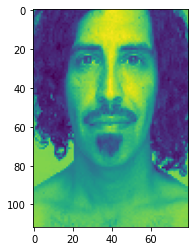

In [ ]:
# Посмотрим на случайное изображение
plt.imshow(xTrain_img[np.random.randint(0, xTrain_img.shape[0])].reshape(112,80)) 
plt.show()

In [ ]:
# Создадим функцию создания базового автокодировщика, которая 
# вернет на выходе заданную модель

def baseAutoencoder(shape=(112,80,1)): 
    # задаём входные размеры
    img_input = Input((shape)) 

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    z = MaxPooling2D()(x)
    

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) # слой разжимает данные(с 28*20 на 56*40)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x) 

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 56*40 на 112*80)
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)

    # Финальный слой, выдающий итоговое изображение
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети
    model = Model(img_input, x) 
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error') 
    
    return model 

In [ ]:
# создаем автокодировщик
modelAutoFace = baseAutoencoder()

In [ ]:
# загрузим данные в модель, возяв первые 4700 изображений из xTrain_img на вход и на выход
# в качестве проверочной выборки возьмем оставшиеся изображения

modelAutoFace.fit(xTrain_img[:4700], xTrain_img[:4700], epochs=150, batch_size=100,
                  validation_data = (xTrain_img[4700:], xTrain_img[4700:]))

Epoch 1/150
47/47 [==============================] - 8s 177ms/step - loss: 0.0419 - val_loss: 0.0644
Epoch 2/150
47/47 [==============================] - 8s 176ms/step - loss: 0.0118 - val_loss: 0.0640
Epoch 3/150
47/47 [==============================] - 8s 177ms/step - loss: 0.0076 - val_loss: 0.0629
Epoch 4/150
47/47 [==============================] - 8s 179ms/step - loss: 0.0061 - val_loss: 0.0596
Epoch 5/150
47/47 [==============================] - 8s 181ms/step - loss: 0.0053 - val_loss: 0.0533
Epoch 6/150
47/47 [==============================] - 9s 184ms/step - loss: 0.0047 - val_loss: 0.0472
Epoch 7/150
47/47 [==============================] - 9s 185ms/step - loss: 0.0043 - val_loss: 0.0384
Epoch 8/150
47/47 [==============================] - 9s 186ms/step - loss: 0.0041 - val_loss: 0.0325
Epoch 9/150
47/47 [==============================] - 9s 186ms/step - loss: 0.0039 - val_loss: 0.0189
Epoch 10/150
47/47 [==============================] - 9s 184ms/step - loss: 0.0037 - val_lo

In [ ]:
#modelAutoFace.save_weights('modelAutoFace.h5') # Сохраняем модель
#modelAutoFace.load_weights('modelAutoFace.h5') # Сохраняем модель

In [ ]:
# сделаем предикт для первых ста картинок лиц
predFace = modelAutoFace.predict(xTrain_img[:100])

# представляем в виде значений от 0 до 255 и
# установим 8ми битовый тип
predFace = predFace * 255 
predFace = predFace.astype('uint8')

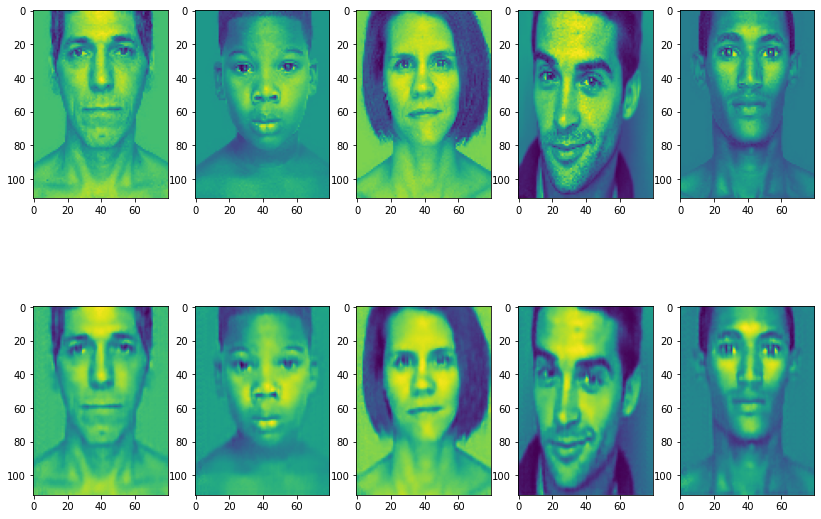

In [ ]:
# выведем оригинальные лица и сгенерированные автокодировщиком
# на примере 5 изображений
n = 5  
plt.figure(figsize=(14, 10)) 
for i in range(n): 
    index = np.random.randint(0, predFace.shape[0]) 
    ax = plt.subplot(2, n, i + 1) 
    # оригигинальные изображения
    plt.imshow(xTrain_img[index].reshape(112, 80))

    # восстановленные изображения
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(predFace[index].reshape(112, 80))
plt.show()

In [ ]:
# создадим функцию среднеквадратичной ошибки
# которая на выходе возвращает сумму квадратов разницы значений,
# делённую на длину разницы значений

def getMSE(x1, x2): 
  x1 = x1.flatten() 
  x2 = x2.flatten() 
  delta = x1 - x2 
  return sum(delta ** 2) / len(delta) 

In [ ]:
# посчитаем ошибку для всех изображений

errFace = [getMSE(xTrain_img[i], predFace[i] / 255) for i in range(len(predFace))] 

print("Ошибки на базе Лиц по изоброжениям:")
for n in range(len(errFace)):
  print("на " + str(n + 1) + "м: " + str(round(errFace[n], 4)))
  
print("Средняя ошибка на базе Лиц:", round(sum(errFace) / len(errFace), 4))
print("Минимальная ошибка на базе Лиц:", round(min(errFace), 4))

Ошибки на базе Лиц по изоброжениям:
на 1м: 0.002
на 2м: 0.0006
на 3м: 0.0008
на 4м: 0.0006
на 5м: 0.0008
на 6м: 0.0013
на 7м: 0.001
на 8м: 0.0006
на 9м: 0.0012
на 10м: 0.0013
на 11м: 0.0011
на 12м: 0.0007
на 13м: 0.0012
на 14м: 0.0008
на 15м: 0.001
на 16м: 0.0011
на 17м: 0.0011
на 18м: 0.0007
на 19м: 0.001
на 20м: 0.0005
на 21м: 0.0012
на 22м: 0.0006
на 23м: 0.0019
на 24м: 0.0006
на 25м: 0.0008
на 26м: 0.0011
на 27м: 0.0009
на 28м: 0.0008
на 29м: 0.0005
на 30м: 0.011
на 31м: 0.0008
на 32м: 0.0006
на 33м: 0.0012
на 34м: 0.0008
на 35м: 0.0006
на 36м: 0.0011
на 37м: 0.0009
на 38м: 0.0005
на 39м: 0.0009
на 40м: 0.0011
на 41м: 0.0008
на 42м: 0.0006
на 43м: 0.0006
на 44м: 0.001
на 45м: 0.0009
на 46м: 0.0006
на 47м: 0.0025
на 48м: 0.0022
на 49м: 0.0012
на 50м: 0.0006
на 51м: 0.0011
на 52м: 0.0005
на 53м: 0.0004
на 54м: 0.0012
на 55м: 0.0015
на 56м: 0.0085
на 57м: 0.001
на 58м: 0.0016
на 59м: 0.0008
на 60м: 0.0017
на 61м: 0.0008
на 62м: 0.0007
на 63м: 0.0007
на 64м: 0.0009
на 65м: 0.0009
на 66

In [ ]:
 # попытаемся установить пороговое значение, такое,
 # чтобы процент распознавания был максимально высоким
 
bias = 0.0020

isFace = [e < bias for e in errFace[80:]] 

print("Лица распознаны, как Лица: ", round(100*sum(isFace) / len(isFace)),"%", sep="")

Лица распознаны, как Лица: 80.0%


## **PRO**

### Задание:

Напишите “автокодировщик”, который будет из рукописных цифр MNIST генерировать из соответствующего изображения на CIFAR или Fashion Mnist, т.е. генерируйте из цифры MNIST - картинки CIFAR или Fashion Mnistсоответствующего класса

(это не совсем автокодировщик, так как у автокодировщика вход строго равен выходу, но архитектура очень близкая к автокодировщику)


In [ ]:
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist, fashion_mnist 

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from PIL import Image
import os #
from google.colab import drive 
import time

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# зададим функцию создания базового автокодировщика
def baseAutoencoder(shape=(112,80,1)): 
    img_input = Input((shape)) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = MaxPooling2D()(x) 
    

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)  
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)  
    x = BatchNormalization()(x) 

    z = MaxPooling2D()(x) # передаём на слой подвыборки
    
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) # слой разжимает данные(с 28*20 на 56*40)
    x = BatchNormalization()(x) 
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
 
    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 56*40 на 112*80)
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)

    # Финальный слой двумерной свертки, выдающий итоговое изображение
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x) # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error') # компилируем модель с оптимайзером Адам и среднеквадратичной ошибкой

    # функция вернёт заданную модель
    return model 

In [ ]:
# создадим функцию для вывода изображений (входных и сгенерированных)
def plotImages(xTrain, pred, shape=(112, 80)): 
  n = 10 
  plt.figure(figsize=(20, 5)) 
  for i in range(n): 
      if ( i != 0 ):
        index = i*6000 
      else:
        index = i 
      # Показываем картинки из входного набора
      ax = plt.subplot(2, n, i + 1) 
      plt.imshow(xTrain[index].reshape(shape))     
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 

      # Показываем сгенерированные картинки
      ax = plt.subplot(2, n, i + 1 + n) 
      plt.imshow(pred[index].reshape(shape))      
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 
  plt.show()

In [ ]:
# создадим функцию среднеквадратичной ошибки,
# которая вернет сумму квадратов разницы, делённую на длину разницы
def getMSE(x1, x2):
  x1 = x1.flatten() 
  x2 = x2.flatten() 
  delta = x1 - x2 
  return sum(delta ** 2) / len(delta) 

In [ ]:
# загружаем данные из баз MNIST и Fashion MNIST с разбивкой на train/test
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data() 
(xTrainMnistF, yTrainMnistF), (xTestMnistF, yTestMnistF) = fashion_mnist.load_data()

# представляем в виде значений от 0 до 1
xTrainMnist = xTrainMnist.astype('float32')/255
xTrainMnistF = xTrainMnistF.astype('float32')/255

# меняем форму, приводим к нужным нам размерам
xTrainMnist = xTrainMnist.reshape(-1, 28, 28, 1) 
xTrainMnistF = xTrainMnistF.reshape(xTrainMnistF.shape[0], 28, 28, 1) 

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
yTrainMnist

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Отсортируем xTrainMnist и  yTrainMnist, по позрастанию
# создав новые отсортированные массивы my_xTrainMnist и my_yTrainMnist
# И посмотрим скольно в нем каких данных
# выведем верхний индекс пребывания числа(0,1..9) в массиве

my_xTrainMnist = xTrainMnist.copy()
my_yTrainMnist = yTrainMnist.copy()

n = 0 
for j in range(10):
    i = 0 
    for i in range(len(yTrainMnist)):
      if (yTrainMnist[i] == j):
          my_xTrainMnist[n] = xTrainMnist[i]
          my_yTrainMnist[n] = j
          n += 1      
    print(n) 

5923
12665
18623
24754
30596
36017
41935
48200
54051
60000


In [ ]:
# Проверим
my_yTrainMnist 

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

Как оказалось, данные не сбалансированы, следовательно перед тем как подать данные в сеть, нужно их сбалансировать

In [ ]:
# Сбалансируем my_xTrainMnist и my_yTrainMnist
copy_xTrainMnist = my_xTrainMnist.copy()

n_0 = np.random.randint(1, 5000) # 0
n_1 = np.random.randint(6000, 12000) # 1
n_2 = np.random.randint(13000, 18000) # 2
n_3 = np.random.randint(19000, 24000) # 3
n_4 = np.random.randint(25000, 30000) # 4
n_5 = np.random.randint(31000, 36000) # 5
n_6 = np.random.randint(37000, 41000) # 6
n_7 = np.random.randint(42000, 48000) # 7
n_8 = np.random.randint(49000, 54000) # 8
n_9 = np.random.randint(55000, 59000) # 9

# 0
for i in range(5923, 6000): # (5923 - 5999)
      my_xTrainMnist[i] = copy_xTrainMnist[n_0]
      my_yTrainMnist[i] = 0

# 2
for i in range(12000, 12666):
      my_xTrainMnist[i] = copy_xTrainMnist[n_2]
      my_yTrainMnist[i] = 2

# 3
for i in range(18000, 18623):
      my_xTrainMnist[i] = copy_xTrainMnist[n_3]
      my_yTrainMnist[i] = 3

# 4
for i in range(24000, 24755):
      my_xTrainMnist[i] = copy_xTrainMnist[n_4]
      my_yTrainMnist[i] = 4     

5
for i in range(30000, 30597):
      my_xTrainMnist[i] = copy_xTrainMnist[n_5]
      my_yTrainMnist[i] = 5   

# 6
for i in range(36000, 36018):
      my_xTrainMnist[i] = copy_xTrainMnist[n_6]
      my_yTrainMnist[i] = 6  

for i in range(41934, 42000):
      my_xTrainMnist[i] = copy_xTrainMnist[n_6]
      my_yTrainMnist[i] = 6 

# 8
for i in range(48000, 48200):
      my_xTrainMnist[i] = copy_xTrainMnist[n_8]
      my_yTrainMnist[i] = 8

# 9
for i in range(54000, 54051):
      my_xTrainMnist[i] = copy_xTrainMnist[n_9]
      my_yTrainMnist[i] = 9  

In [ ]:
# Проверим как сбалансировались данные

n = 0 
for j in range(10):
    i = 0 
    for i in range(len(my_yTrainMnist)):
      if (my_yTrainMnist[i] == j):
          n += 1      
    print(n) 

6000
12000
18000
24000
30000
36000
42000
48000
54000
60000


In [ ]:
yTrainMnistF

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Отсортируем xTrainMnistF и yTrainMnistF, по позрастанию
# создав новые отсортированные массивы my_xTrainMnistF и my_yTrainMnistF
# И посмотрим скольно в нем каких данных
# выведем верхний индекс пребывания числа(0,1,..,9) в массиве

my_xTrainMnistF = xTrainMnistF.copy()
my_yTrainMnistF = yTrainMnistF.copy()

n = 0 
for j in range(10):
    i = 0 
    for i in range(len(yTrainMnistF)):
      if (yTrainMnistF[i] == j):
          my_xTrainMnistF[n] = xTrainMnistF[i]
          my_yTrainMnistF[n] = j
          n += 1      
    print(n) 

6000
12000
18000
24000
30000
36000
42000
48000
54000
60000


In [ ]:
my_yTrainMnistF

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [ ]:
yTestMnist

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# Отсортируем xTestMnist и yTestMnist, по позрастанию
# создав новые отсортированные массивы my_xTestMnist и my_yTestMnist
# И посмотрим скольно в нем каких данных
# выведем верхний индекс пребывания числа(0,1,..,9) в массиве

my_xTestMnist = xTestMnist.copy()
my_yTestMnist = yTestMnist.copy()

n = 0 
for j in range(10):
    i = 0 
    for i in range(len(yTestMnist)):
      if (yTestMnist[i] == j):
          my_xTestMnist[n] = xTestMnist[i]
          my_yTestMnist[n] = j
          n += 1      
    print(n)


my_xTestMnist = my_xTestMnist.astype('float32')/255 

my_xTestMnist = my_xTestMnist.reshape(-1, 28, 28, 1)   

980
2115
3147
4157
5139
6031
6989
8017
8991
10000


In [ ]:
my_yTestMnist

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

Как оказалось, данные не сбалансированы, следовательно перед тем как подать данные в сеть, нужно их сбалансировать

In [ ]:
# Сбалансируем my_xTestMnist и my_yTestMnist
copy_xTestMnist = my_xTestMnist.copy()

n_0 = np.random.randint(1, 900) # 0
n_1 = np.random.randint(1000, 2000) # 1
n_2 = np.random.randint(2200, 3000) # 2
n_3 = np.random.randint(3200, 4000) # 3
n_4 = np.random.randint(4200, 5000) # 4
n_5 = np.random.randint(5200, 6000) # 5
n_6 = np.random.randint(6100, 6900) # 6
n_7 = np.random.randint(7000, 8000) # 7
n_8 = np.random.randint(8100, 8900) # 8
n_9 = np.random.randint(9000, 9990) # 9

# 0
for i in range(980, 1000):
      my_xTestMnist[i] = copy_xTrainMnist[n_0]
      my_yTestMnist[i] = 0

# 2
for i in range(2000, 2116):
      my_xTestMnist[i] = copy_xTrainMnist[n_2]
      my_yTestMnist[i] = 2

# 3
for i in range(3000, 3148):
      my_xTestMnist[i] = copy_xTrainMnist[n_3]
      my_yTestMnist[i] = 3

# 4
for i in range(4000, 4158):
      my_xTestMnist[i] = copy_xTrainMnist[n_4]
      my_yTestMnist[i] = 4     

5
for i in range(5000, 5140):
      my_xTestMnist[i] = copy_xTrainMnist[n_5]
      my_yTestMnist[i] = 5   

# 6
for i in range(6000, 6032):
      my_xTestMnist[i] = copy_xTrainMnist[n_6]
      my_yTestMnist[i] = 6  

for i in range(6989, 7000):
      my_xTestMnist[i] = copy_xTrainMnist[n_6]
      my_yTestMnist[i] = 6 

# 8
for i in range(8000, 8018):
      my_xTestMnist[i] = copy_xTrainMnist[n_8]
      my_yTestMnist[i] = 8

for i in range(8991, 9000):
      my_xTestMnist[i] = copy_xTrainMnist[n_8]
      my_yTestMnist[i] = 8  

In [ ]:
# Проверим как сбалансировались данные

n = 0 
for j in range(10):
    i = 0 
    for i in range(len(my_yTestMnist)):
      if (my_yTestMnist[i] == j):
          n += 1      
    print(n) 

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [ ]:
yTestMnistF

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Отсортируем xTestMnistF и yTestMnistF, по позрастанию
# создав новые отсортированные массивы my_xTestMnistF и my_yTestMnistF
# И посмотрим скольно в нем каких данных
# выведем верхний индекс пребывания числа(0,1,..,9) в массиве

my_xTestMnistF = xTestMnistF.copy()
my_yTestMnistF = yTestMnistF.copy()

n = 0 
for j in range(10):
    i = 0 
    for i in range(len(yTestMnistF)):
      if (yTestMnistF[i] == j):
          my_xTestMnistF[n] = xTestMnistF[i]
          my_yTestMnistF[n] = j
          n += 1      
    print(n)


my_xTestMnistF = my_xTestMnistF.astype('float32')/255

my_xTestMnistF = my_xTestMnistF.reshape(xTestMnistF.shape[0], 28, 28, 1)     

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [ ]:
my_yTestMnistF

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

Теперь данные отсортированы и сбалансированы и готовы для подачи в сеть

In [ ]:
modelAutoMnist = baseAutoencoder((28,28,1)) # создаем автокодировщик

# Подадим на вход сети MNIST (my_xTrainMnist)
# А на выход сети Fashion MNIST (my_xTrainMnistF)
modelAutoMnist.fit(my_xTrainMnist, my_xTrainMnistF, epochs=300, batch_size=256, validation_data = (xTestMnist, xTestMnistF), shuffle=False)

Epoch 1/300
235/235 [==============================] - 27s 115ms/step - loss: 0.1254 - val_loss: 0.1475
Epoch 2/300
235/235 [==============================] - 27s 114ms/step - loss: 0.1012 - val_loss: 0.1244
Epoch 3/300
235/235 [==============================] - 27s 115ms/step - loss: 0.0921 - val_loss: 0.1141
Epoch 4/300
235/235 [==============================] - 28s 117ms/step - loss: 0.0882 - val_loss: 0.1316
Epoch 5/300
235/235 [==============================] - 27s 116ms/step - loss: 0.0864 - val_loss: 0.1231
Epoch 6/300
235/235 [==============================] - 27s 116ms/step - loss: 0.0824 - val_loss: 0.1253
Epoch 7/300
235/235 [==============================] - 27s 116ms/step - loss: 0.0794 - val_loss: 0.1247
Epoch 8/300
235/235 [==============================] - 27s 117ms/step - loss: 0.0783 - val_loss: 0.1193
Epoch 9/300
235/235 [==============================] - 27s 117ms/step - loss: 0.0769 - val_loss: 0.1212
Epoch 10/300
235/235 [==============================] - 27s 117m

In [ ]:
modelAutoMnist.save_weights('modelAutoMnist300ep.h5') # Сохраняем модель
modelAutoMnist.load_weights('modelAutoMnist300ep.h5') # Сохраняем модель

**Тестирование**

In [ ]:
# создадим функцию для тестового вывода картинок,
# подаваемых на вход сети и тех что получаем на выходе

def plotImages(xTrain, pred, shape=(112, 80)): 
  n = 10 
  plt.figure(figsize=(20, 5)) 
  for i in range(n): 
      if ( i != 0 ):
        index = i*1000 
      else:
        index = i 
      # Показываем картинки из входного набора
      ax = plt.subplot(2, n, i + 1) 
      plt.imshow(xTrain[index].reshape(shape))     
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 

      # Показываем сгенерированные картинки
      ax = plt.subplot(2, n, i + 1 + n) 
      plt.imshow(pred[index].reshape(shape))      
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 
  plt.show()

In [ ]:
# просим модель вернуть нам изображение подавая на вход Mnist
# ожидаем получить Fashion MNIST

predMnistF = modelAutoMnist.predict(my_xTestMnist) 

predMnistF = predMnistF
predMnistF = predMnistF.astype('uint8')

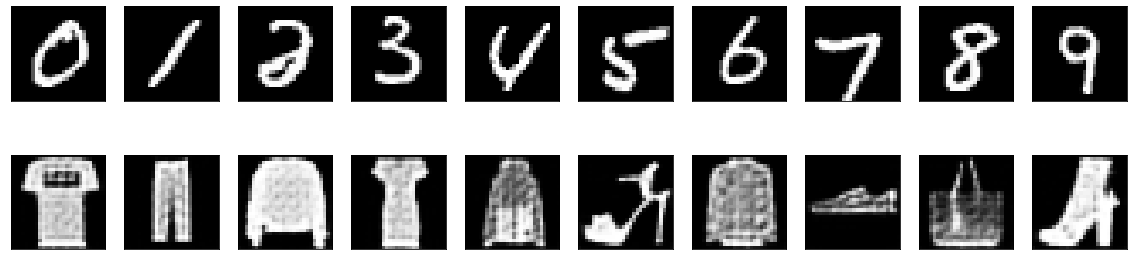

In [ ]:
# покажем исходные и сгенерированные изображения

plotImages(my_xTestMnist, predMnistF, shape=(28,28)) 

Как видим, результат вполне неплохой. По картинке вполне можно распознать что за вид одежды на ней изображен, и классы входного датасета MNIST и полученного Fashion MNIST совпадают. ( 0 - футболки, 1 - брюки и т.д.)

# **ULTRA PRO**

## **Вариант 1**

**Задание:**

Сделайте раскраску фотографий с помощью автокодировщиков
1. Возьмите базу цветных фотографий (лучше однородных, например, 500 фото природы или 500 фото моря и т.п.)
2. Преобразуйте их в чёрно-белые
3. Обучите автокодировщик превращать чёрно-белые изображения в цветные


*работать может не идеально, для корректной раскраски нужно делать некоторые ухищрения, кроме автокодировщика

**это не совсем автокодировщик, так как у автокодировщика вход строго равен выходу, но архитектура очень близкая к автокодировщику

***это не работает в RGB палитре, надо переходить в LAB палитру


In [ ]:
# Импорт библиотек
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import os
import numpy as np
import random
import tensorflow as tf
import cv2
import matplotlib.image as img
import matplotlib.pyplot as plt

Для данного задания было собрано 500 изображений летнего леса, фотмата 400x400. 

In [ ]:
!unzip -q '/content/drive/My Drive/Forest_500.zip' # Тренировачные данные, 500 картинок летнего леса 
!unzip -q '/content/drive/My Drive/Test_img_gray_version.zip' # Тестовые данные, ч/б картинки
!unzip -q '/content/drive/My Drive/Original.zip' # Оригинальные цветные картинки, из которых сделаны тестовые ч/б картинки

In [ ]:
# Создадим необходимые нам папки поместим туда скаченные данные
folder_train = "Forest_500"
folder_test = "Test_img_gray_version"
model_file = "forests.h5"

brightness_corr = 250
do_train = True

In [ ]:
# Загрузим тренировочные танные и преобразуем их в нужный нам формат
X = []
for filename in os.listdir(folder_train):
    X.append(img_to_array(load_img(folder_train + os.sep + filename)))
X = np.array([cv2.resize(i, (400, 400)) for i in X], dtype=float)/255.0
X = np.array(X, dtype=float)
Xtrain = X

In [ ]:
# Подготовим данные, ч/б картинки на вход и цветные на выход
datagen = ImageDataGenerator()
batch_size = 10
def images(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch.reshape(X_batch.shape+(1,)), Y_batch)

In [ ]:
# Создадим модель
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

# Компилируем
model.compile(optimizer='rmsprop', loss='mse')

# Обучаем
# Для сокращения места вывода, так как Колаб вылетает у меня(прекращает вывод результатов) 
# при большом количестве эпох, используем параметр steps_per_epoch = 1500 и epochs = 1.
model.fit(images(batch_size), epochs=1, steps_per_epoch=1500)

1500/1500 [==============================] - 1111s 740ms/step - loss: 0.0263


**Тестируем**

In [ ]:
# Подготовим тестовые данные
gray_images = []
n = 5
for i in range(n):
  filename = 'test_img_' + str(i) + '.png'
  if filename in os.listdir(folder_test):
    gray_images.append(img_to_array(load_img(folder_test + os.sep + filename)))
gray_images = np.array([cv2.resize(i, (400, 400)) for i in gray_images], dtype=float)
gray_images = rgb2lab(1.0/255*gray_images)[:,:,:,0]
gray_images = gray_images.reshape(gray_images.shape+(1,))

# Пробуем окрасить ч/б картинки
output = model.predict(gray_images)
for i in range(len(output)):
    cur = np.zeros((400, 400, 3))
    cur[:,:,0] = gray_images[i][:,:,0]
    cur[:,:,1:] = output[i] * 128
    img_rgb = lab2rgb(cur)*brightness_corr
    imsave("img_result_%d.png" % i, img_rgb.astype(np.uint8))

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 8 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


In [ ]:
# создадим функцию для вывода изображений
def plotImages(): 
  n = 5

  plt.figure(figsize=(20, 5))
  print()
  print("Оригинальные изображения\n") 
  for i in range(n): 
      index = i 
      # Показываем оригинальные цветные картинки
      ax = plt.subplot(1, n, i + 1) 
      plt.imshow(img.imread('Original/img_original_'+ str(index) + '.jpg'))      
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 
  plt.show()

  plt.figure(figsize=(20, 5)) 
  print()
  print("Черно-белые изображения\n")
  for i in range(n): 
      index = i 
      # Показываем картинки из входного тестового набора (черно-белые)
      ax = plt.subplot(1, n, i + 1)  
      plt.imshow(img.imread('Test_img_gray_version/test_img_'+ str(index) + '.png'))    
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 
  plt.show()   

  plt.figure(figsize=(20, 5))
  print()
  print("Раскрашенные изображения\n") 
  for i in range(n): 
      index = i 
      # Показываем окрашенные нейронной сетью картинки
      ax = plt.subplot(1, n, i + 1) 
      plt.imshow(img.imread('img_result_'+ str(index) + '.png'))      
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 
  plt.show()


Оригинальные изображения



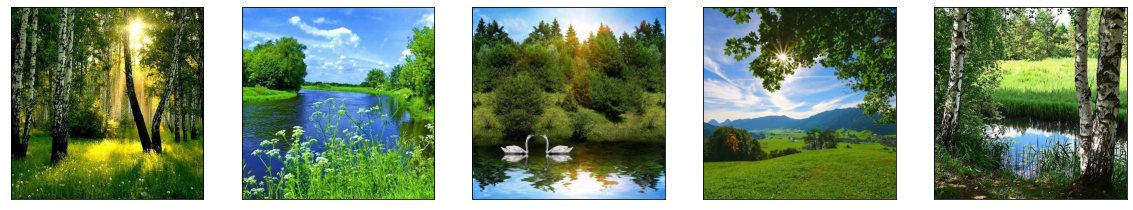


Черно-белые изображения



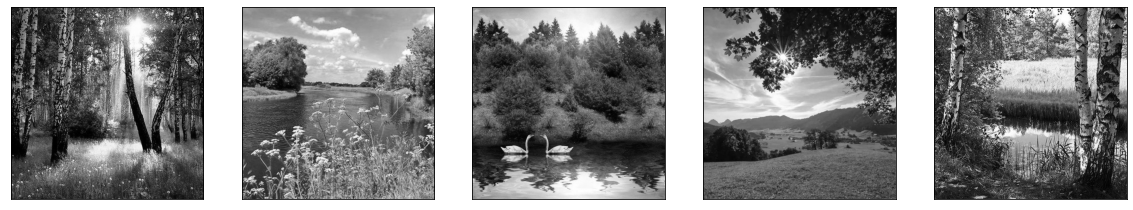


Раскрашенные изображения



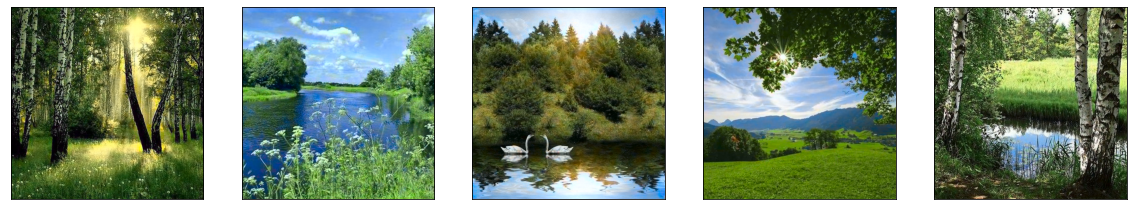

In [ ]:
# Посмотрим на резельтаты
plotImages() 

**Итоги:**  Раскрашенные черно-белые изображения, раскрасились великолепно! И что казалось какой-то фантастикой, оказалось вполне реальным! Но если присмотрется всё равно видно, что окрашенные изображения имеют определенные дефекты, они не такие яркие и насыщеные как исходные, и на некоторых из них наблюдаются еле заметные желтые пятна((( Что говорит о том, что совершенству нет предела(по мне они и так шикаршие получились) и над качеством можно еще поработать -  увеличить базу, поработать над гиперпараметрами сети и т.д. Сама по себе тема колоризации не простая и обширная, и наверняка существует еще множество хитростей и приемов для идеальной колоризации. 